In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [20]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=0)

In [23]:
x_train.isnull().mean()

Age     0.198034
Fare    0.000000
dtype: float64

In [31]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

In [32]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)

In [27]:
x_train.sample(5)

,Age,Fare,age_mean,age_median
879,56.0,83.1583,56.0,56.0
821,27.0,8.6625,27.0,27.0
220,16.0,8.0500,16.0,16.0
767,30.5,7.7500,30.5,30.5
245,44.0,90.0000,44.0,44.0


In [33]:
print('Orginal age variance : ', x_train['Age'].var())
print('After mean imputation : ',x_train['age_mean'].var())
print('After median imputation : ',x_train["age_median"].var())

Orginal age variance :  213.7165085187578
After mean imputation :  171.33390978297038
After median imputation :  171.42222438960798


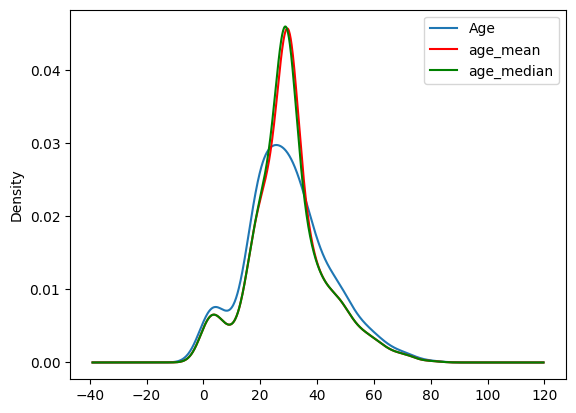

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde', ax=ax)
x_train['age_mean'].plot(kind='kde', ax=ax, color = 'red')
x_train['age_median'].plot(kind='kde', ax=ax, color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [42]:
x_train.corr()

,Age,Fare,age_mean,age_median
Age,1.00000,0.101560,1.000000,1.000000
Fare,0.10156,1.000000,0.096597,0.098592
age_mean,1.00000,0.096597,1.000000,0.999742
age_median,1.00000,0.098592,0.999742,1.000000


<Axes: >

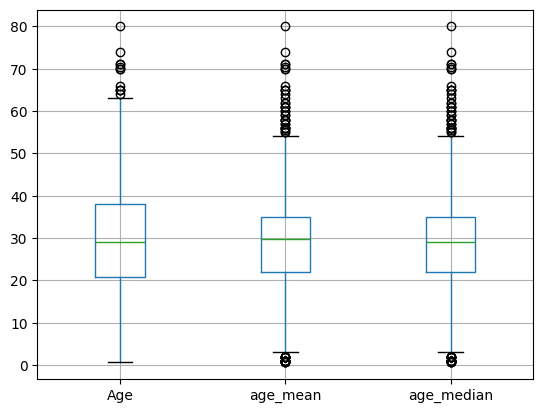

In [43]:
x_train[['Age', 'age_mean','age_median']].boxplot()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=0)

In [45]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [47]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age'])
],remainder='passthrough')

In [48]:
trf.fit(x_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [49]:
trf.named_transformers_['imputer1'].statistics_

array([29.])